In [1]:
import pandas as pd
import matplotlib.pyplot as plt

from sklearn import datasets
from pyclustering.cluster.clarans import clarans

## 1: Load the Iris df

In [20]:
# Download dataset
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"
df = pd.read_csv(url, header=None, names=["sepal_length", "sepal_width", "petal_length", "petal_width", "class"])
print(df.head())


   sepal_length  sepal_width  petal_length  petal_width        class
0           5.1          3.5           1.4          0.2  Iris-setosa
1           4.9          3.0           1.4          0.2  Iris-setosa
2           4.7          3.2           1.3          0.2  Iris-setosa
3           4.6          3.1           1.5          0.2  Iris-setosa
4           5.0          3.6           1.4          0.2  Iris-setosa


## 2: Write a short documentation of the dataset

In [21]:
print(df.describe(),df.info(), df.shape)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   class         150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB
       sepal_length  sepal_width  petal_length  petal_width
count    150.000000   150.000000    150.000000   150.000000
mean       5.843333     3.054000      3.758667     1.198667
std        0.828066     0.433594      1.764420     0.763161
min        4.300000     2.000000      1.000000     0.100000
25%        5.100000     2.800000      1.600000     0.300000
50%        5.800000     3.000000      4.350000     1.300000
75%        6.400000     3.300000      5.100000     1.800000
max        7.900000     4.400000      6.900000     2.500000 Non

Documentation: The Iris datasets consists of 150 entries and 5 Variables including sepal length, sepal width, petal length, petal width and their species. 

In [23]:
X = df.iloc[:,[2,3]]
y = df.iloc[:,4]
print(X,y)

     petal_length  petal_width
0             1.4          0.2
1             1.4          0.2
2             1.3          0.2
3             1.5          0.2
4             1.4          0.2
..            ...          ...
145           5.2          2.3
146           5.0          1.9
147           5.2          2.0
148           5.4          2.3
149           5.1          1.8

[150 rows x 2 columns] 0         Iris-setosa
1         Iris-setosa
2         Iris-setosa
3         Iris-setosa
4         Iris-setosa
            ...      
145    Iris-virginica
146    Iris-virginica
147    Iris-virginica
148    Iris-virginica
149    Iris-virginica
Name: class, Length: 150, dtype: object


In [24]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, shuffle=True, stratify=y, random_state=1)

In [45]:
print(X_train.shape,y_train.shape,X_test.shape,y_test.shape)

(90, 2) (90,) (60, 2) (60,)


Random Baseline:

In [32]:
y_train.value_counts()

class
Iris-virginica     30
Iris-setosa        30
Iris-versicolor    30
Name: count, dtype: int64

In [37]:
correct = (y_test == 'Iris-virginica').sum()
correct/len(y_test)

0.3333333333333333

A baseline that guesses Iris-virginica has an accuracy score of: 33%

In [62]:
# Lets start with an arbitrary choice of parameters
from sklearn import neighbors
clf = neighbors.KNeighborsClassifier(3, 
    weights='uniform', 
    metric="euclidean", algorithm="brute")

# Train the classifier
clf.fit(X_train, y_train)

KNeighborsClassifier(algorithm='brute', metric='euclidean', n_neighbors=3)

In [63]:
y_test_pred = clf.predict(X_test)

In [64]:
from sklearn import metrics
round(metrics.accuracy_score(y_test, y_test_pred),3)

0.983

In [68]:
def get_acc(k, voting, metric):
    clf = neighbors.KNeighborsClassifier(k, weights=voting, metric=metric, algorithm="brute")
    clf.fit(X_train, y_train)
    y_test_pred = clf.predict(X_test)
    acc=metrics.accuracy_score(y_test, y_test_pred)
    #print(k, voting, round(acc, 3))
    return acc


uniform_euclidean_acc=[]
distance_euclidean_acc=[]
uniform_manhattan_acc=[]
distance_manhattan_acc=[]
for k in range(1,50):
    uniform_euclidean_acc.append(get_acc(k, 'uniform', 'euclidean'))
    distance_euclidean_acc.append(get_acc(k, 'distance', 'euclidean'))
    uniform_manhattan_acc.append(get_acc(k, 'uniform', 'manhattan'))
    distance_manhattan_acc.append(get_acc(k, 'distance', 'manhattan'))


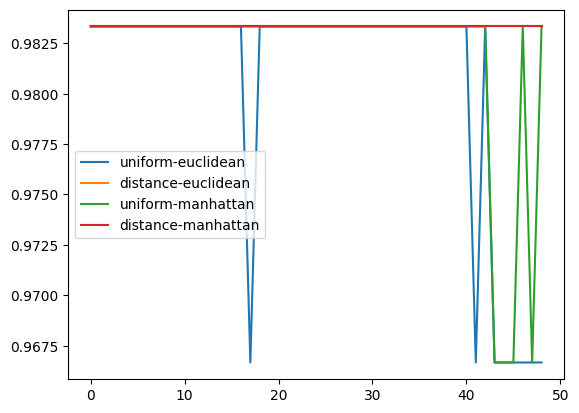

In [73]:
import matplotlib.pyplot as plt
plt.plot(range(49), uniform_euclidean_acc, label='uniform-euclidean')
plt.plot(range(49), distance_euclidean_acc, label='distance-euclidean')
plt.plot(range(49), uniform_manhattan_acc, label='uniform-manhattan')
plt.plot(range(49), distance_manhattan_acc, label='distance-manhattan')
plt.legend()